In [1]:
import os
os.chdir('../')

In [2]:
import numpy as np

In [3]:
from src.preprocess import pre_process
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

[nltk_data] Downloading package stopwords to /home/gui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gui/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/gui/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
class BernoulliNB:

    def __init__(self, alpha=1):
        self.alpha = alpha

    def fit(self, X, y):
        self.n_classes = len(np.unique(y))
        n_classes = self.n_classes

        self.counts = np.zeros(n_classes)
        for i in y:
            self.counts[int(i)] += 1
        self.counts /= len(y)

        self.params = np.zeros((n_classes, X.shape[1]))
        for idx in range(len(X)):
            self.params[int(y[idx])] += X[idx]
        self.params += self.alpha 

        self.class_sums = np.zeros(self.n_classes)
        for i in y:
            self.class_sums[int(i)] += 1
        self.class_sums += self.n_classes*self.alpha 

        self.params = self.params / self.class_sums[:, np.newaxis]

    def predict(self, X):
        neg_prob = np.log(1 - self.params)
        jll = np.dot(X, (np.log(self.params) - neg_prob).T)
        jll += np.log(self.counts) + neg_prob.sum(axis=1)
        return np.argmax(jll, axis=1)

In [10]:
X, y, vectorizer = pre_process('dataset/train.csv',
                                 data = 'train',
                                 vectorizer = 'binary',
                                 max_features = 6000)


cleaning...
vectorizing...
done!


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=11)

In [12]:
bnb = BernoulliNB(0.2)
bnb.fit(X_train, y_train)

In [13]:
y_pred = bnb.predict(X_val).astype(int)
y_val = y_val.astype(int)

In [14]:
accuracy_score(y_pred, y_val)

0.7866666666666666

In [11]:
from sklearn.metrics import confusion_matrix

In [12]:
cm = confusion_matrix(y_val, y_pred, normalize='true')

In [13]:
import matplotlib.pyplot as plt

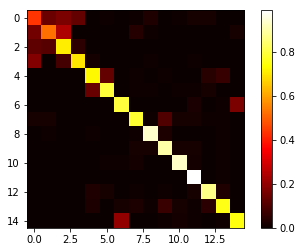

In [14]:
plt.imshow(cm, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

In [18]:
np.diagonal(cm)

array([0.43820225, 0.52631579, 0.71134021, 0.7008547 , 0.73033708,
       0.79347826, 0.79646018, 0.78640777, 0.93577982, 0.9010989 ,
       0.93518519, 0.98947368, 0.87234043, 0.76      , 0.75      ])

In [15]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [16]:
y_pred = clf.predict(X_val).astype(int)

In [17]:
accuracy_score(y_pred, y_val)

77.66666666666666


In [19]:
scores = []
for features in range (500, 5001, 500):
    X_train, X_val, y_train, y_val, vectorizer = pre_process('dataset/train.csv',
                                                         data = 'train',
                                                         vectorizer = 'binary',
                                                         max_features = features)
    for alpha in range(1, 11, 1):
        bnb = BernoulliNB(alpha*0.1)
        bnb.fit(X_train, y_train)
        y_pred = bnb.predict(X_val).astype(int)
        y_val = y_val.astype(int)
        scores.append((features, alpha, accuracy_score(y_pred, y_val)))

cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!
cleaning...
splitting data...
vectorizing...
done!


In [20]:
scores

[(500, 1, 0.696),
 (500, 2, 0.6946666666666667),
 (500, 3, 0.696),
 (500, 4, 0.6966666666666667),
 (500, 5, 0.6966666666666667),
 (500, 6, 0.696),
 (500, 7, 0.6946666666666667),
 (500, 8, 0.6946666666666667),
 (500, 9, 0.6946666666666667),
 (500, 10, 0.6946666666666667),
 (1000, 1, 0.7326666666666667),
 (1000, 2, 0.7353333333333333),
 (1000, 3, 0.7373333333333333),
 (1000, 4, 0.7366666666666667),
 (1000, 5, 0.7373333333333333),
 (1000, 6, 0.738),
 (1000, 7, 0.7393333333333333),
 (1000, 8, 0.7393333333333333),
 (1000, 9, 0.7406666666666667),
 (1000, 10, 0.7393333333333333),
 (1500, 1, 0.7506666666666667),
 (1500, 2, 0.7533333333333333),
 (1500, 3, 0.752),
 (1500, 4, 0.7526666666666667),
 (1500, 5, 0.7526666666666667),
 (1500, 6, 0.752),
 (1500, 7, 0.7533333333333333),
 (1500, 8, 0.7513333333333333),
 (1500, 9, 0.7513333333333333),
 (1500, 10, 0.7513333333333333),
 (2000, 1, 0.7606666666666667),
 (2000, 2, 0.762),
 (2000, 3, 0.764),
 (2000, 4, 0.7646666666666667),
 (2000, 5, 0.7646666666

In [21]:
max(scores, key=lambda item: item[2])

(5000, 2, 0.79)